# Sample Stock Analysis

In [1]:
import sys
sys.path.append('../python')

from data import load_data
from stats import compute_stats
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

We'll analyze **AAPL** (Apple) and **MSFT** (Microsoft) over the past year.

In [2]:
# Load stock data
aapl = load_data("AAPL", "1y")
msft = load_data("MSFT", "1y")

print(f"AAPL: {len(aapl)} trading days")
print(f"MSFT: {len(msft)} trading days")

AAPL: 249 trading days
MSFT: 249 trading days


## Statistical Summary

In [3]:
# Compute statistics for both stocks
aapl_stats = compute_stats(aapl)
msft_stats = compute_stats(msft)

# Create comparison DataFrame
stats_df = pd.DataFrame({
    'AAPL': aapl_stats,
    'MSFT': msft_stats
})

print("Performance Statistics:")
print(stats_df)

Performance Statistics:
                AAPL      MSFT
mean        0.000656  0.000591
volatility  0.020410  0.015329
min        -0.092456 -0.061809
max         0.153288  0.101337


## Price Comparison

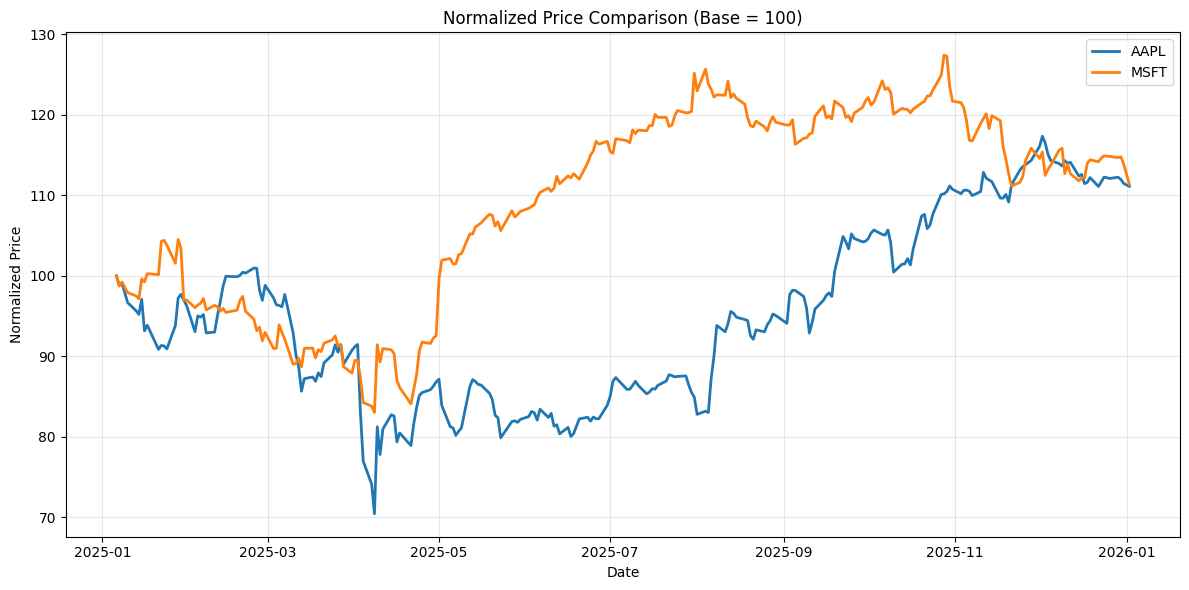

In [4]:
# Normalize prices to start at 100 for comparison
aapl_norm = (aapl["Close"] / aapl["Close"].iloc[0]) * 100
msft_norm = (msft["Close"] / msft["Close"].iloc[0]) * 100

plt.figure(figsize=(12, 6))
plt.plot(aapl_norm.index, aapl_norm.values, label='AAPL', linewidth=2)
plt.plot(msft_norm.index, msft_norm.values, label='MSFT', linewidth=2)
plt.title('Normalized Price Comparison (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Returns Distribution

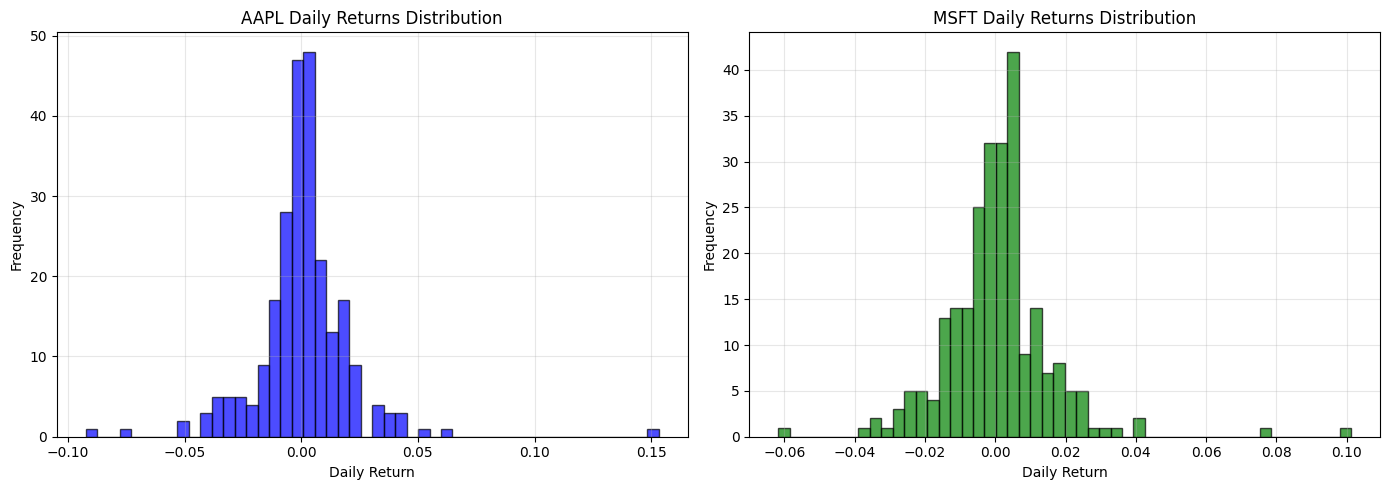

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(aapl['returns'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('AAPL Daily Returns Distribution')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(msft['returns'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('MSFT Daily Returns Distribution')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Total Return Analysis

In [6]:
# Calculate total returns
aapl_total_return = ((aapl["Close"].iloc[-1] / aapl["Close"].iloc[0]) - 1) * 100
msft_total_return = ((msft["Close"].iloc[-1] / msft["Close"].iloc[0]) - 1) * 100

print(f"Total Return (1 year):")
print(f"  AAPL: {aapl_total_return:.2f}%")
print(f"  MSFT: {msft_total_return:.2f}%")
print(f"\nAnnualized Volatility:")
print(f"  AAPL: {aapl_stats['volatility'] * (252**0.5) * 100:.2f}%")
print(f"  MSFT: {msft_stats['volatility'] * (252**0.5) * 100:.2f}%")

Total Return (1 year):
  AAPL: 11.12%
  MSFT: 11.35%

Annualized Volatility:
  AAPL: 32.40%
  MSFT: 24.33%
